Dataset yang digunakan yaitu Klasifikasi Kemiskinan di Indonesia yang diambil dari Kaggle. Dataset ini berisi data kemiskinan dari berbagai kabupaten/kota di seluruh Indonesia, lengkap dengan berbagai indikator ekonomi dan sosial seperti persentase penduduk miskin, pengeluaran per kapita, Indeks Pembangunan Manusia (IPM), dan tingkat pengangguran.

https://www.kaggle.com/datasets/ermila/klasifikasi-kemiskinan

# - SETUP & IMPORT LIBRARY

In [ ]:
# Library data manipulation
import pandas as pd
import numpy as np

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Library untuk analisis lanjutan
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from pandas.plotting import parallel_coordinates
import warnings

# Konfigurasi
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("✅ Semua library berhasil diimport!")
print("=" * 60)

✅ Semua library berhasil diimport!


# - Load Dataset

In [ ]:
print("\n📂 MEMUAT DATASET...")
print("=" * 60)

# Upload file di Google Colab
from google.colab import files
uploaded = files.upload()

# Baca CSV dengan pemisah semicolon (;) dan ubah koma jadi titik
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, sep=';', decimal=',')

print(f"✅ Dataset berhasil dimuat: {file_name}")
print(f"📊 Dimensi data: {df.shape[0]} baris × {df.shape[1]} kolom\n")

# Tampilkan 5 baris pertama
print("🔍 Preview Data:")
display(df.head())


📂 MEMUAT DATASET...


Saving Klasifikasi Tingkat Kemiskinan di Indonesia..csv to Klasifikasi Tingkat Kemiskinan di Indonesia..csv
✅ Dataset berhasil dimuat: Klasifikasi Tingkat Kemiskinan di Indonesia..csv
📊 Dimensi data: 514 baris × 7 kolom

🔍 Preview Data:


,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Tingkat Pengangguran Terbuka,Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98",7148,66.41,5.71,0
1,ACEH,Aceh Singkil,"20,36",8776,69.22,8.36,1
2,ACEH,Aceh Selatan,"13,18",8180,67.44,6.46,0
3,ACEH,Aceh Tenggara,"13,41",8030,69.44,6.43,0
4,ACEH,Aceh Timur,"14,45",8577,67.83,7.13,0


# - EKSPLORASI AWAL DATA (DATA PROFILING)

In [ ]:
print("\n" + "=" * 60)
print("📋 INFORMASI DATASET")
print("=" * 60)

# Informasi tipe data
print("\n1️⃣ Tipe Data:")
df.info()

# Statistik deskriptif
print("\n2️⃣ Statistik Deskriptif:")
display(df.describe())

# Cek missing values
print("\n3️⃣ Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "✅ Tidak ada missing values!")

# Cek duplikat
print(f"\n4️⃣ Data Duplikat: {df.duplicated().sum()} baris")

# Distribusi target variable
print("\n5️⃣ Distribusi Kelas Target (Klasifikasi Kemiskinan):")
target_counts = df['Klasifikasi Kemiskinan'].value_counts()
print(target_counts)
print(f"\nPersentase:")
print((target_counts / len(df) * 100).round(2))


📋 INFORMASI DATASET

1️⃣ Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Provinsi                                                         514 non-null    object 
 1   Kab/Kota                                                         514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  514 non-null    object 
 3   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)     514 non-null    int64  
 4   Indeks Pembangunan Manusia                                       514 non-null    float64
 5   Tingkat Pengangguran Terbuka                                     514 non-null    float64
 6   Klasifikasi Kemiskinan                                           514 non-null    int64  
dtypes: float

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Tingkat Pengangguran Terbuka,Klasifikasi Kemiskinan
count,514.000000,514.000000,514.000000,514.000000
mean,10324.787938,69.926770,5.059494,0.120623
std,2717.144186,6.497033,2.636970,0.326005
min,3976.000000,32.840000,0.000000,0.000000
25%,8574.000000,66.642500,3.180000,0.000000
50%,10196.500000,69.610000,4.565000,0.000000
75%,11719.000000,73.112500,6.530000,0.000000
max,23888.000000,87.180000,13.370000,1.000000



3️⃣ Missing Values:
✅ Tidak ada missing values!

4️⃣ Data Duplikat: 0 baris

5️⃣ Distribusi Kelas Target (Klasifikasi Kemiskinan):
Klasifikasi Kemiskinan
0    452
1     62
Name: count, dtype: int64

Persentase:
Klasifikasi Kemiskinan
0    87.94
1    12.06
Name: count, dtype: float64


# - DATA CLEANING & PREPARATION

In [ ]:
print("\n" + "=" * 60)
print("🧹 DATA CLEANING")
print("=" * 60)

# Simpan kolom untuk visualisasi
kolom_numerik = [
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
    'Indeks Pembangunan Manusia',
    'Tingkat Pengangguran Terbuka'
]

# Rename kolom untuk memudahkan penggunaan
df.rename(columns={
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)': 'Persentase_Miskin',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)': 'Pengeluaran_Kapita',
    'Indeks Pembangunan Manusia': 'IPM',
    'Tingkat Pengangguran Terbuka': 'Pengangguran'
}, inplace=True)

# Update kolom numerik
kolom_numerik = ['Persentase_Miskin', 'Pengeluaran_Kapita', 'IPM', 'Pengangguran']

# PENTING: Konversi kolom string ke numerik (handle format Indonesia)
for col in kolom_numerik:
    # Jika kolom masih string, replace koma dengan titik lalu convert ke float
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.').astype(float)

print("✅ Konversi data numerik berhasil!")

# Verifikasi tipe data setelah konversi
print("\n📊 Tipe data setelah konversi:")
for col in kolom_numerik:
    print(f"  - {col}: {df[col].dtype}")

# Tambah label target
df['Label_Kemiskinan'] = df['Klasifikasi Kemiskinan'].map({
    0: 'Tidak Miskin',
    1: 'Miskin'
})

print("\n✅ Data cleaning selesai!")
print(f"✅ Kolom numerik: {len(kolom_numerik)}")
print(f"✅ Target variable: Klasifikasi Kemiskinan (0: Tidak Miskin, 1: Miskin)")



🧹 DATA CLEANING
✅ Konversi data numerik berhasil!

📊 Tipe data setelah konversi:
  - Persentase_Miskin: float64
  - Pengeluaran_Kapita: int64
  - IPM: float64
  - Pengangguran: float64

✅ Data cleaning selesai!
✅ Kolom numerik: 4
✅ Target variable: Klasifikasi Kemiskinan (0: Tidak Miskin, 1: Miskin)


# - VISUALISASI DISTRIBUSI (UNIVARIATE ANALYSIS)


📊 VISUALISASI DISTRIBUSI VARIABEL NUMERIK


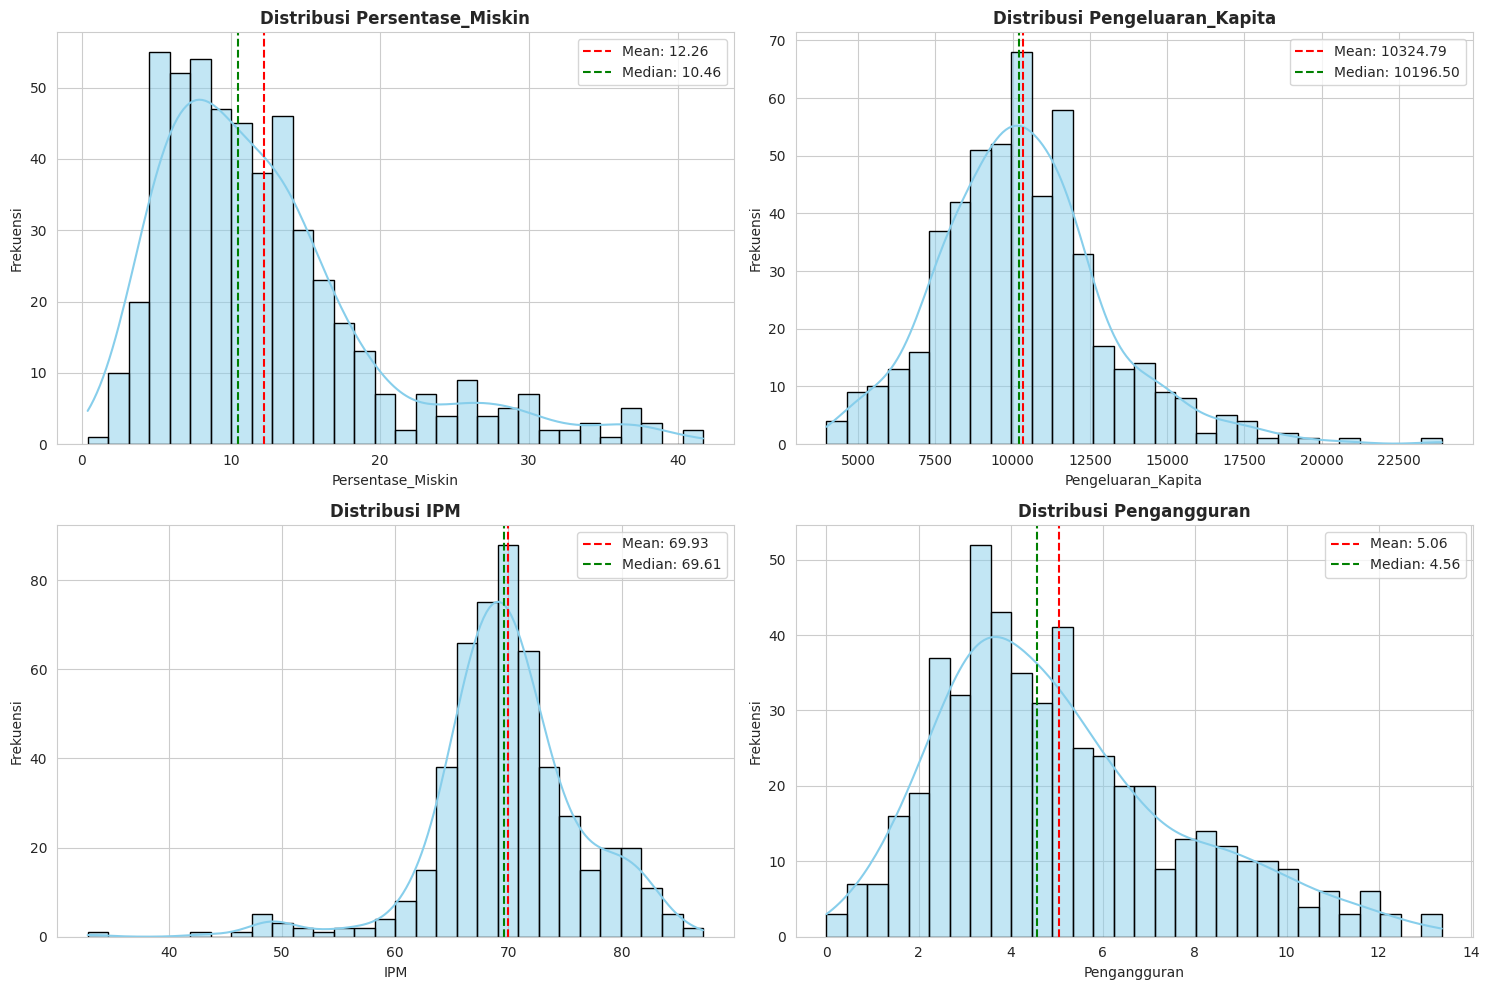


💡 INTERPRETASI:
- Histogram menunjukkan sebaran frekuensi data
- Kurva KDE (Kernel Density Estimate) menunjukkan estimasi distribusi
- Garis merah (mean) dan hijau (median) membantu identifikasi skewness
- Jika mean ≠ median → data skewed (tidak simetris)



In [ ]:
print("\n" + "=" * 60)
print("📊 VISUALISASI DISTRIBUSI VARIABEL NUMERIK")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(kolom_numerik):
    # Histogram dengan KDE
    sns.histplot(data=df, x=col, kde=True, bins=30,
                 color='skyblue', ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frekuensi', fontsize=10)

    # Tambahkan statistik
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

print("""
💡 INTERPRETASI:
- Histogram menunjukkan sebaran frekuensi data
- Kurva KDE (Kernel Density Estimate) menunjukkan estimasi distribusi
- Garis merah (mean) dan hijau (median) membantu identifikasi skewness
- Jika mean ≠ median → data skewed (tidak simetris)
""")

# - DETEKSI OUTLIER DENGAN BOXPLOT



📦 DETEKSI OUTLIER


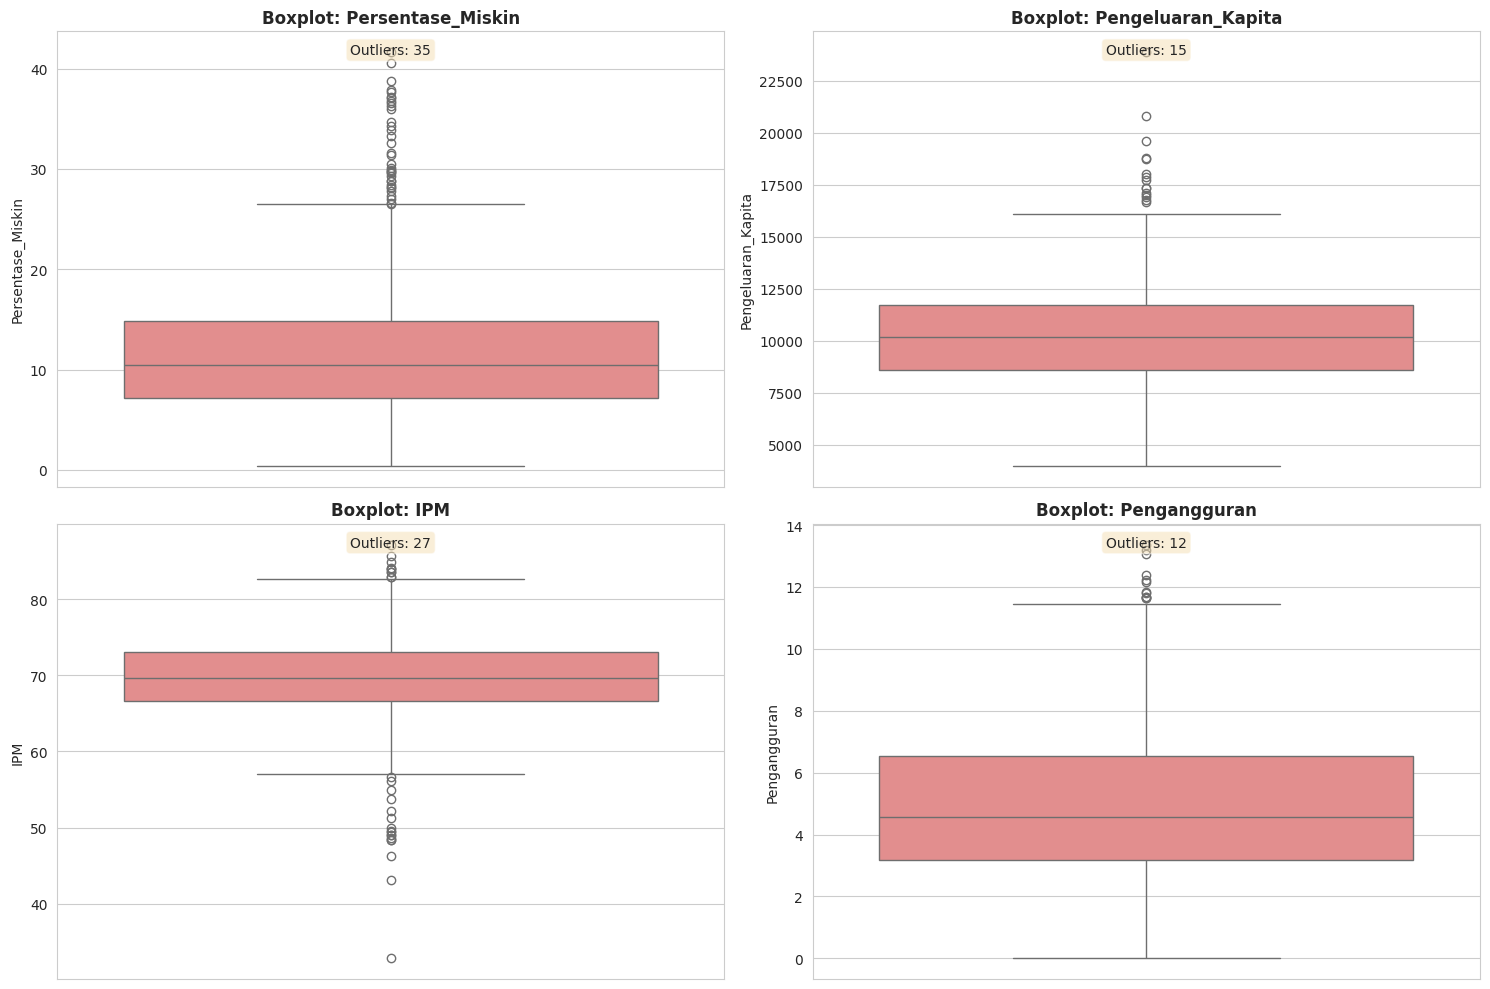


💡 INTERPRETASI BOXPLOT:
- Kotak menunjukkan Q1 (25%) sampai Q3 (75%) data
- Garis tengah = Median
- Titik di luar "whiskers" = Outlier potensial
- Outlier bisa jadi data valid atau error → perlu investigasi lanjut



In [ ]:
print("\n" + "=" * 60)
print("📦 DETEKSI OUTLIER")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(kolom_numerik):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10)

    # Hitung jumlah outlier
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()

    axes[idx].text(0.5, 0.95, f'Outliers: {outliers}',
                   transform=axes[idx].transAxes, ha='center',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("""
💡 INTERPRETASI BOXPLOT:
- Kotak menunjukkan Q1 (25%) sampai Q3 (75%) data
- Garis tengah = Median
- Titik di luar "whiskers" = Outlier potensial
- Outlier bisa jadi data valid atau error → perlu investigasi lanjut
""")

# - VISUALISASI BIVARIATE: FITUR vs TARGET


🔄 HUBUNGAN FITUR DENGAN TARGET


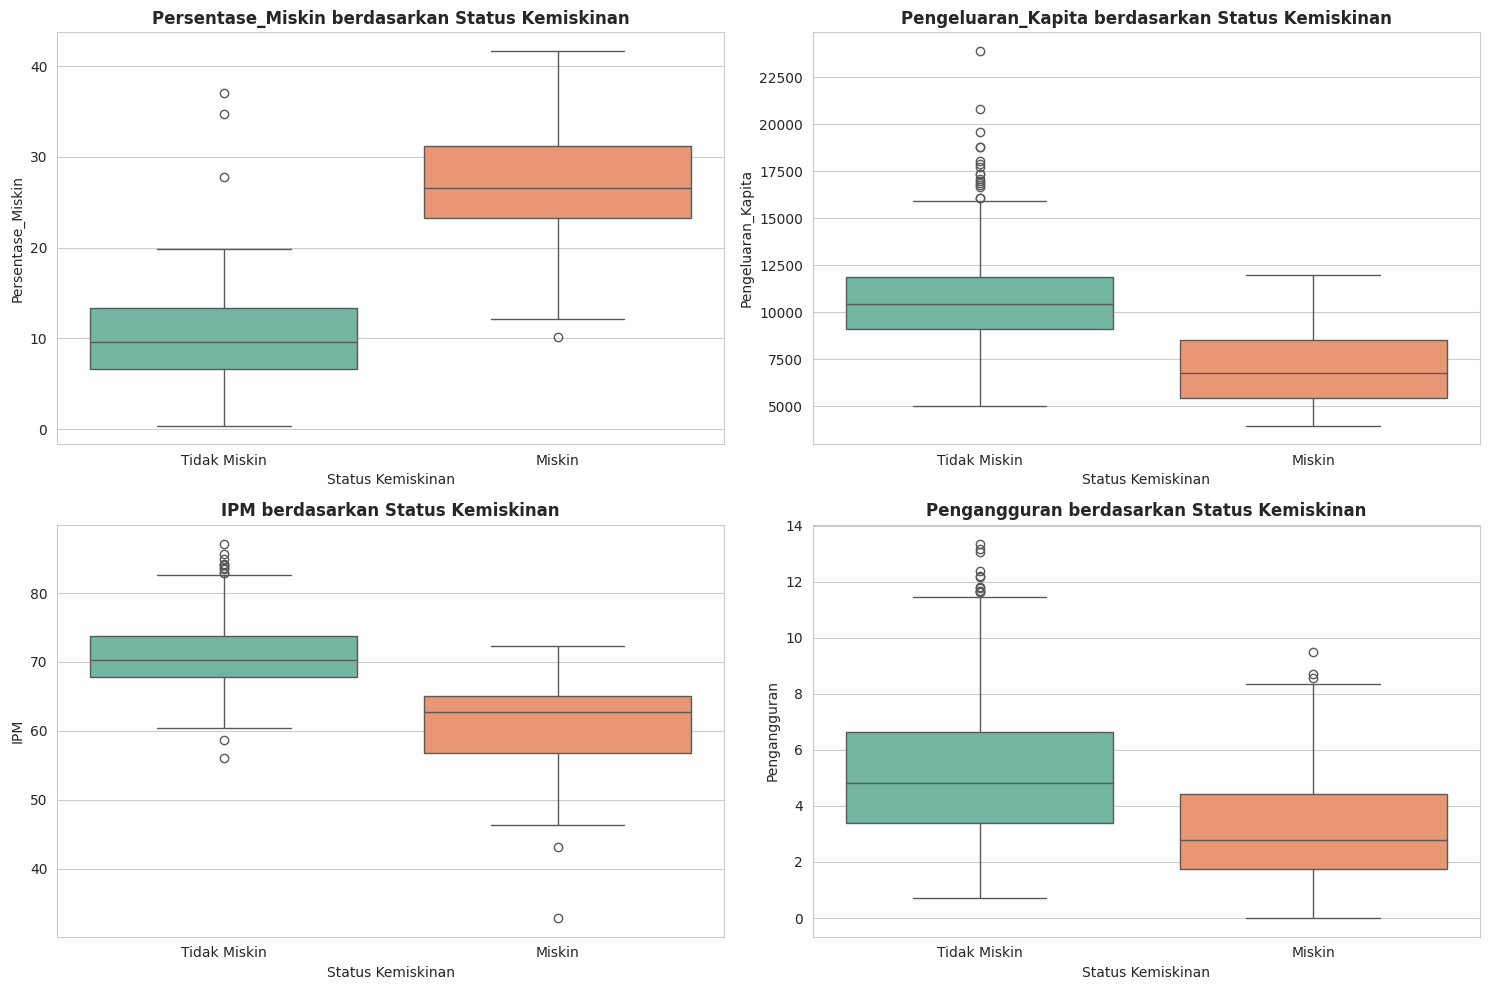


💡 INTERPRETASI:
- Jika median kedua kelas berbeda signifikan → fitur punya daya diskriminasi tinggi
- Overlap yang besar → fitur kurang efektif untuk klasifikasi
- Fitur terbaik: perbedaan distribusi yang jelas antar kelas



In [ ]:
print("\n" + "=" * 60)
print("🔄 HUBUNGAN FITUR DENGAN TARGET")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(kolom_numerik):
    sns.boxplot(data=df, x='Label_Kemiskinan', y=col,
                palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{col} berdasarkan Status Kemiskinan',
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Status Kemiskinan', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

print("""
💡 INTERPRETASI:
- Jika median kedua kelas berbeda signifikan → fitur punya daya diskriminasi tinggi
- Overlap yang besar → fitur kurang efektif untuk klasifikasi
- Fitur terbaik: perbedaan distribusi yang jelas antar kelas
""")

# - HEATMAP KORELASI


🔥 ANALISIS KORELASI ANTAR VARIABEL


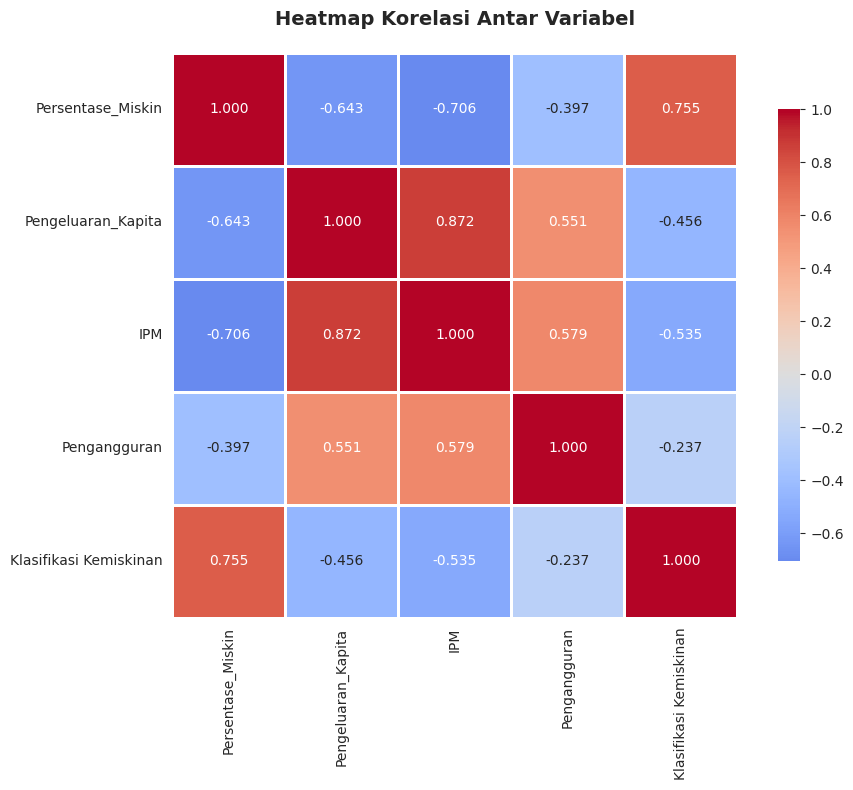


📊 Korelasi dengan Target (Klasifikasi Kemiskinan):
Klasifikasi Kemiskinan    1.000000
Persentase_Miskin         0.755441
Pengangguran             -0.237316
Pengeluaran_Kapita       -0.456122
IPM                      -0.535125
Name: Klasifikasi Kemiskinan, dtype: float64

💡 INTERPRETASI KORELASI:
- Nilai mendekati +1: Korelasi positif kuat (naik bersama)
- Nilai mendekati -1: Korelasi negatif kuat (berbanding terbalik)
- Nilai mendekati 0: Tidak ada korelasi linear
- Multikolinearitas: Jika antar fitur berkorelasi tinggi (>0.8)



In [ ]:
print("\n" + "=" * 60)
print("🔥 ANALISIS KORELASI ANTAR VARIABEL")
print("=" * 60)

# Hitung korelasi
correlation_matrix = df[kolom_numerik + ['Klasifikasi Kemiskinan']].corr()

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f',
            cmap='coolwarm', center=0, square=True,
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Heatmap Korelasi Antar Variabel', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Korelasi dengan Target (Klasifikasi Kemiskinan):")
target_corr = correlation_matrix['Klasifikasi Kemiskinan'].sort_values(ascending=False)
print(target_corr)

print("""
💡 INTERPRETASI KORELASI:
- Nilai mendekati +1: Korelasi positif kuat (naik bersama)
- Nilai mendekati -1: Korelasi negatif kuat (berbanding terbalik)
- Nilai mendekati 0: Tidak ada korelasi linear
- Multikolinearitas: Jika antar fitur berkorelasi tinggi (>0.8)
""")

# - SCATTER PLOT MATRIX (PAIRPLOT)


🎨 SCATTER PLOT MATRIX


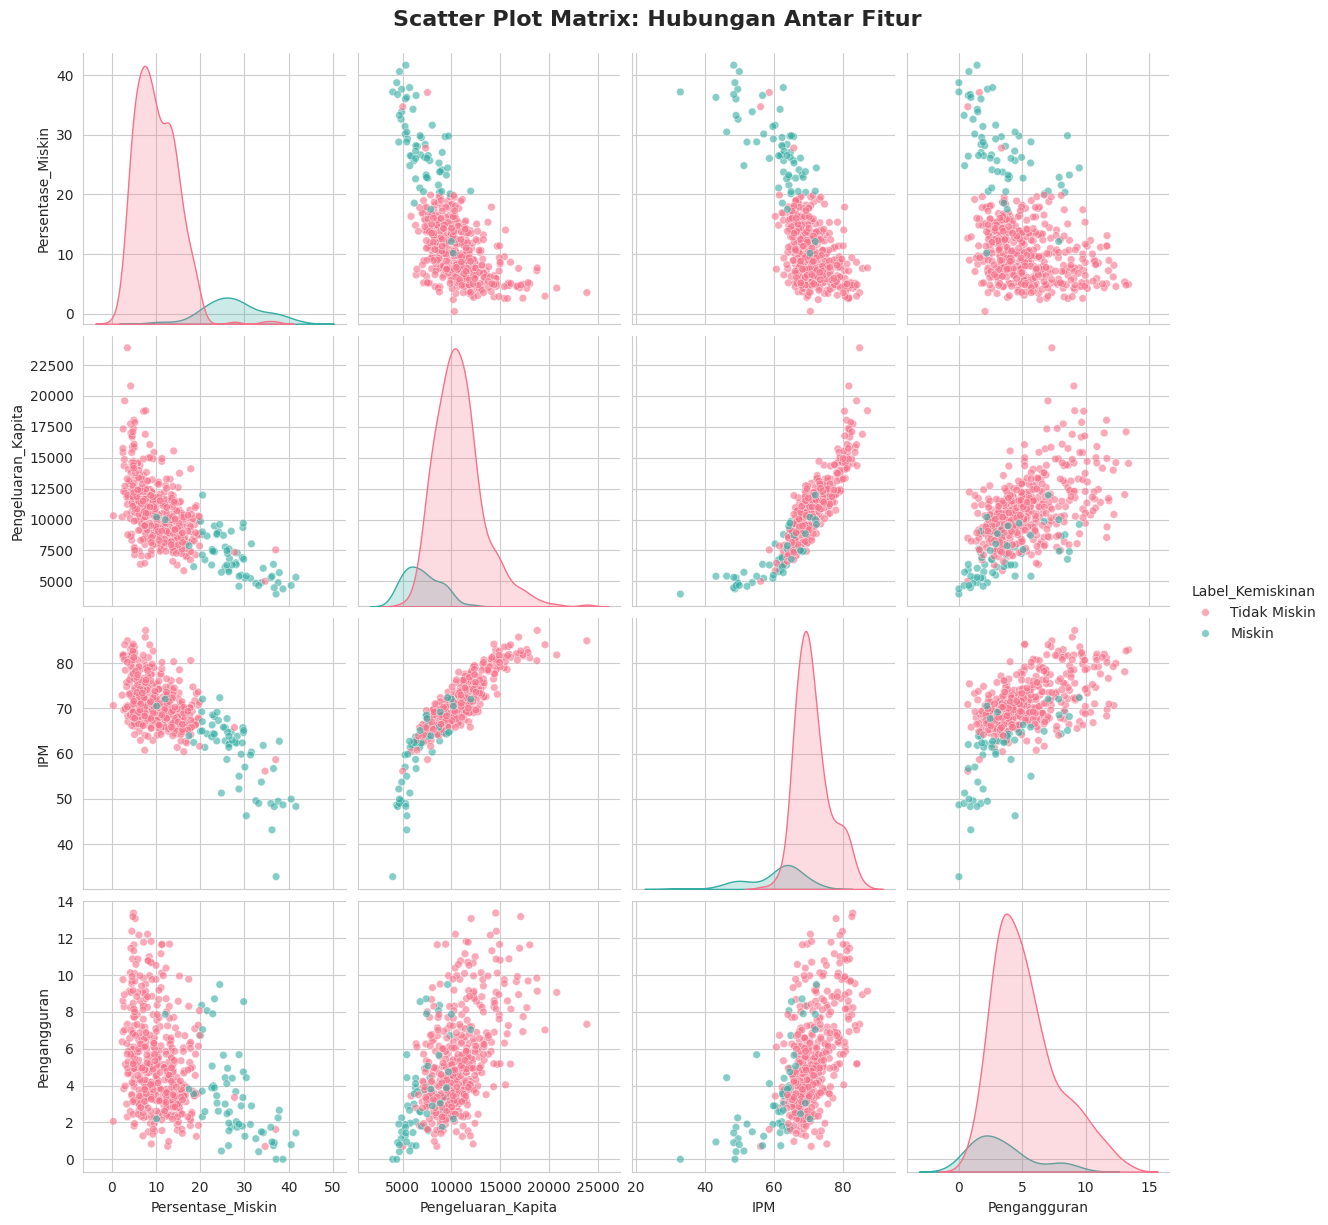


💡 INTERPRETASI PAIRPLOT:
- Diagonal: Distribusi setiap fitur per kelas
- Off-diagonal: Hubungan antar dua fitur
- Pemisahan warna yang jelas → fitur bagus untuk klasifikasi
- Pola linear → korelasi kuat



In [ ]:
print("\n" + "=" * 60)
print("🎨 SCATTER PLOT MATRIX")
print("=" * 60)

# Pairplot dengan pewarnaan berdasarkan target
pairplot = sns.pairplot(df[kolom_numerik + ['Label_Kemiskinan']],
                        hue='Label_Kemiskinan',
                        palette='husl',
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 30},
                        height=3)
pairplot.fig.suptitle('Scatter Plot Matrix: Hubungan Antar Fitur',
                      y=1.02, fontsize=16, fontweight='bold')
plt.show()

print("""
💡 INTERPRETASI PAIRPLOT:
- Diagonal: Distribusi setiap fitur per kelas
- Off-diagonal: Hubungan antar dua fitur
- Pemisahan warna yang jelas → fitur bagus untuk klasifikasi
- Pola linear → korelasi kuat
""")

# - DISTRIBUSI TARGET VARIABLE


🎯 VISUALISASI DISTRIBUSI KELAS TARGET


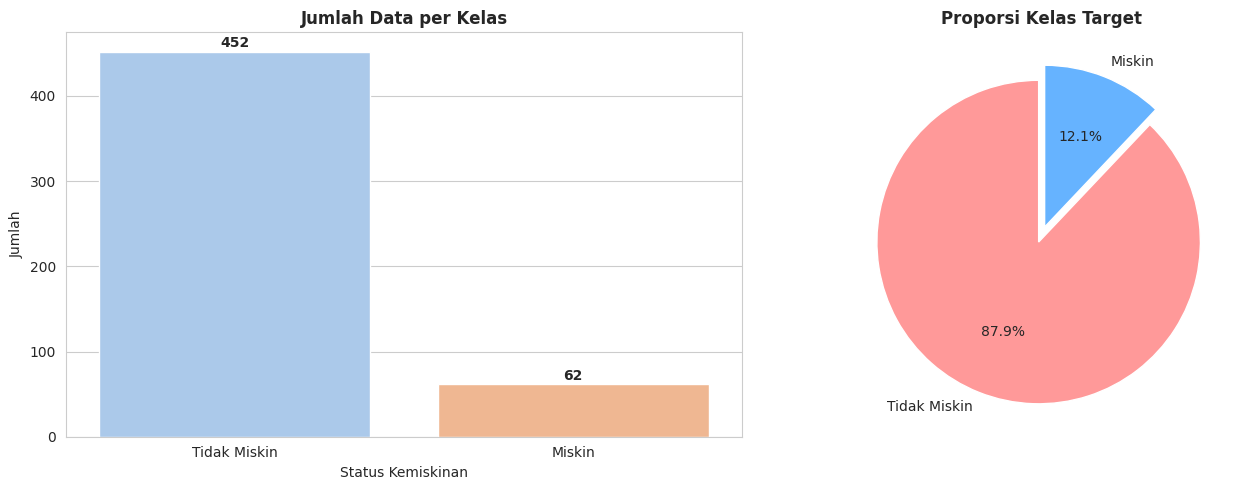


⚖️ Class Imbalance Ratio: 7.29
⚠️ WARNING: Data tidak seimbang! Pertimbangkan teknik handling imbalance.


In [ ]:
print("\n" + "=" * 60)
print("🎯 VISUALISASI DISTRIBUSI KELAS TARGET")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Countplot
target_counts = df['Label_Kemiskinan'].value_counts()
sns.countplot(data=df, x='Label_Kemiskinan', palette='pastel', ax=axes[0])
axes[0].set_title('Jumlah Data per Kelas', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Status Kemiskinan', fontsize=10)
axes[0].set_ylabel('Jumlah', fontsize=10)

# Tambahkan label di atas bar
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['#ff9999', '#66b3ff']
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Proporsi Kelas Target', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Cek class imbalance
ratio = target_counts.max() / target_counts.min()
print(f"\n⚖️ Class Imbalance Ratio: {ratio:.2f}")
if ratio > 1.5:
    print("⚠️ WARNING: Data tidak seimbang! Pertimbangkan teknik handling imbalance.")
else:
    print("✅ Data cukup seimbang.")

# - DISTRIBUSI GEOGRAFIS (TOP PROVINSI)


🗺️ ANALISIS GEOGRAFIS


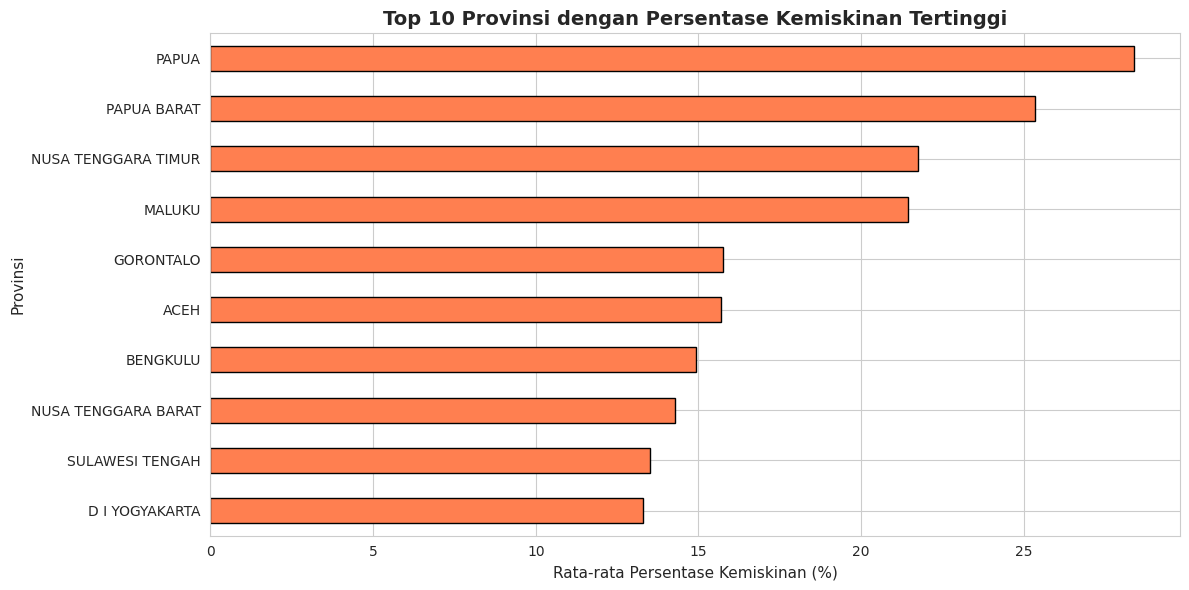


📍 Provinsi dengan kemiskinan tertinggi:
Provinsi
PAPUA                  28.379310
PAPUA BARAT            25.330000
NUSA TENGGARA TIMUR    21.748182
MALUKU                 21.444545
GORONTALO              15.738333
ACEH                   15.693913
BENGKULU               14.929000
NUSA TENGGARA BARAT    14.279000
SULAWESI TENGAH        13.514615
D I YOGYAKARTA         13.288000
Name: Persentase_Miskin, dtype: float64


In [ ]:
print("\n" + "=" * 60)
print("🗺️ ANALISIS GEOGRAFIS")
print("=" * 60)

# Top 10 provinsi dengan kemiskinan tertinggi
top_provinces = df.groupby('Provinsi')['Persentase_Miskin'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_provinces.plot(kind='barh', color='coral', edgecolor='black')
plt.title('Top 10 Provinsi dengan Persentase Kemiskinan Tertinggi',
          fontsize=14, fontweight='bold')
plt.xlabel('Rata-rata Persentase Kemiskinan (%)', fontsize=11)
plt.ylabel('Provinsi', fontsize=11)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n📍 Provinsi dengan kemiskinan tertinggi:")
print(top_provinces)

# - PCA VISUALIZATION (DIMENSIONALITY REDUCTION)


🔬 PCA: REDUKSI DIMENSI & CLUSTERING ANALYSIS


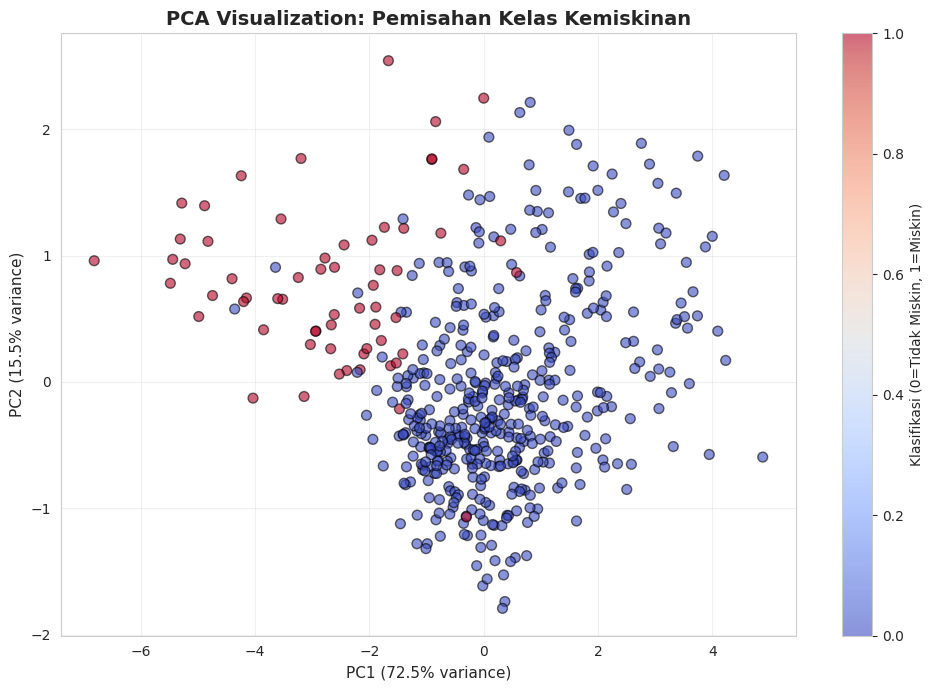


📊 Variance Explained by PCA:
PC1: 72.49%
PC2: 15.49%
Total: 87.97%

💡 INTERPRETASI PCA:
- PCA mengompres 4 fitur menjadi 2 dimensi untuk visualisasi
- PC1 dan PC2 adalah kombinasi linear dari fitur asli
- Jika kelas terpisah jelas → data mudah diklasifikasi
- Overlap besar → model perlu lebih kompleks



In [ ]:
print("\n" + "=" * 60)
print("🔬 PCA: REDUKSI DIMENSI & CLUSTERING ANALYSIS")
print("=" * 60)

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[kolom_numerik])

# PCA dengan 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tambahkan hasil PCA ke dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Visualisasi PCA
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['PC1'], df['PC2'],
                     c=df['Klasifikasi Kemiskinan'],
                     cmap='coolwarm', alpha=0.6, s=50, edgecolors='black')
plt.colorbar(scatter, label='Klasifikasi (0=Tidak Miskin, 1=Miskin)')
plt.title('PCA Visualization: Pemisahan Kelas Kemiskinan',
          fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=11)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Explained variance
print("\n📊 Variance Explained by PCA:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

print("""
💡 INTERPRETASI PCA:
- PCA mengompres 4 fitur menjadi 2 dimensi untuk visualisasi
- PC1 dan PC2 adalah kombinasi linear dari fitur asli
- Jika kelas terpisah jelas → data mudah diklasifikasi
- Overlap besar → model perlu lebih kompleks
""")

# - PARALLEL COORDINATES PLOT


🎛️ PARALLEL COORDINATES PLOT


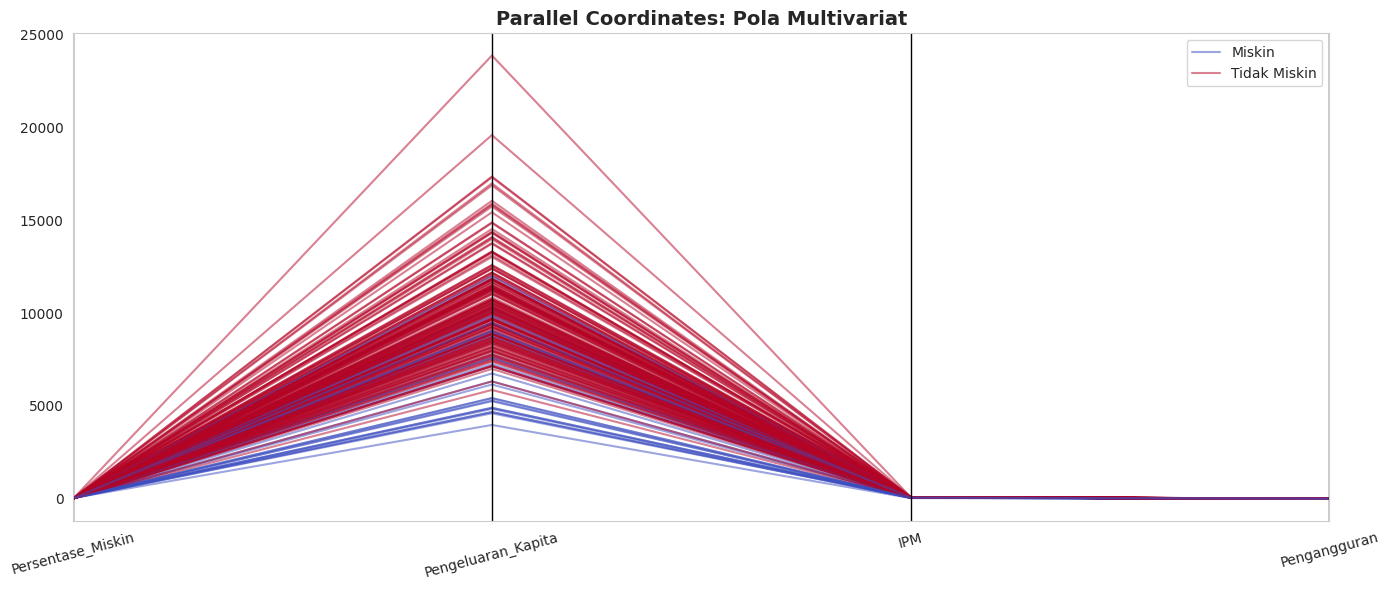


💡 INTERPRETASI:
- Setiap garis = satu data point
- Pola berbeda antar kelas → fitur diskriminatif
- Garis bersilangan banyak → overlap antar kelas



In [ ]:
print("\n" + "=" * 60)
print("🎛️ PARALLEL COORDINATES PLOT")
print("=" * 60)

# Ambil sample untuk visualisasi (agar tidak terlalu ramai)
df_sample = df.sample(n=min(200, len(df)), random_state=42)

plt.figure(figsize=(14, 6))
parallel_coordinates(df_sample[kolom_numerik + ['Label_Kemiskinan']],
                    'Label_Kemiskinan',
                    colormap='coolwarm',
                    alpha=0.5)
plt.title('Parallel Coordinates: Pola Multivariat', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print("""
💡 INTERPRETASI:
- Setiap garis = satu data point
- Pola berbeda antar kelas → fitur diskriminatif
- Garis bersilangan banyak → overlap antar kelas
""")

# - INTERACTIVE VISUALIZATION (PLOTLY)

In [ ]:
print("\n" + "=" * 60)
print("🎬 VISUALISASI INTERAKTIF (PLOTLY)")
print("=" * 60)

# Scatter plot interaktif: IPM vs Pengeluaran
fig = px.scatter(df,
                 x='Pengeluaran_Kapita',
                 y='IPM',
                 color='Label_Kemiskinan',
                 size='Persentase_Miskin',
                 hover_data=['Provinsi', 'Kab/Kota', 'Pengangguran'],
                 title='Visualisasi Interaktif: IPM vs Pengeluaran per Kapita',
                 labels={
                     'Pengeluaran_Kapita': 'Pengeluaran per Kapita (Ribu Rp)',
                     'IPM': 'Indeks Pembangunan Manusia'
                 },
                 color_discrete_map={
                     'Tidak Miskin': '#66b3ff',
                     'Miskin': '#ff9999'
                 })

fig.update_layout(height=600, font=dict(size=11))
fig.show()

print("💡 Hover pada titik untuk melihat detail data!")


🎬 VISUALISASI INTERAKTIF (PLOTLY)


💡 Hover pada titik untuk melihat detail data!


# - VIOLIN PLOT: DISTRIBUSI DETAIL


🎻 VIOLIN PLOT: DISTRIBUSI LENGKAP


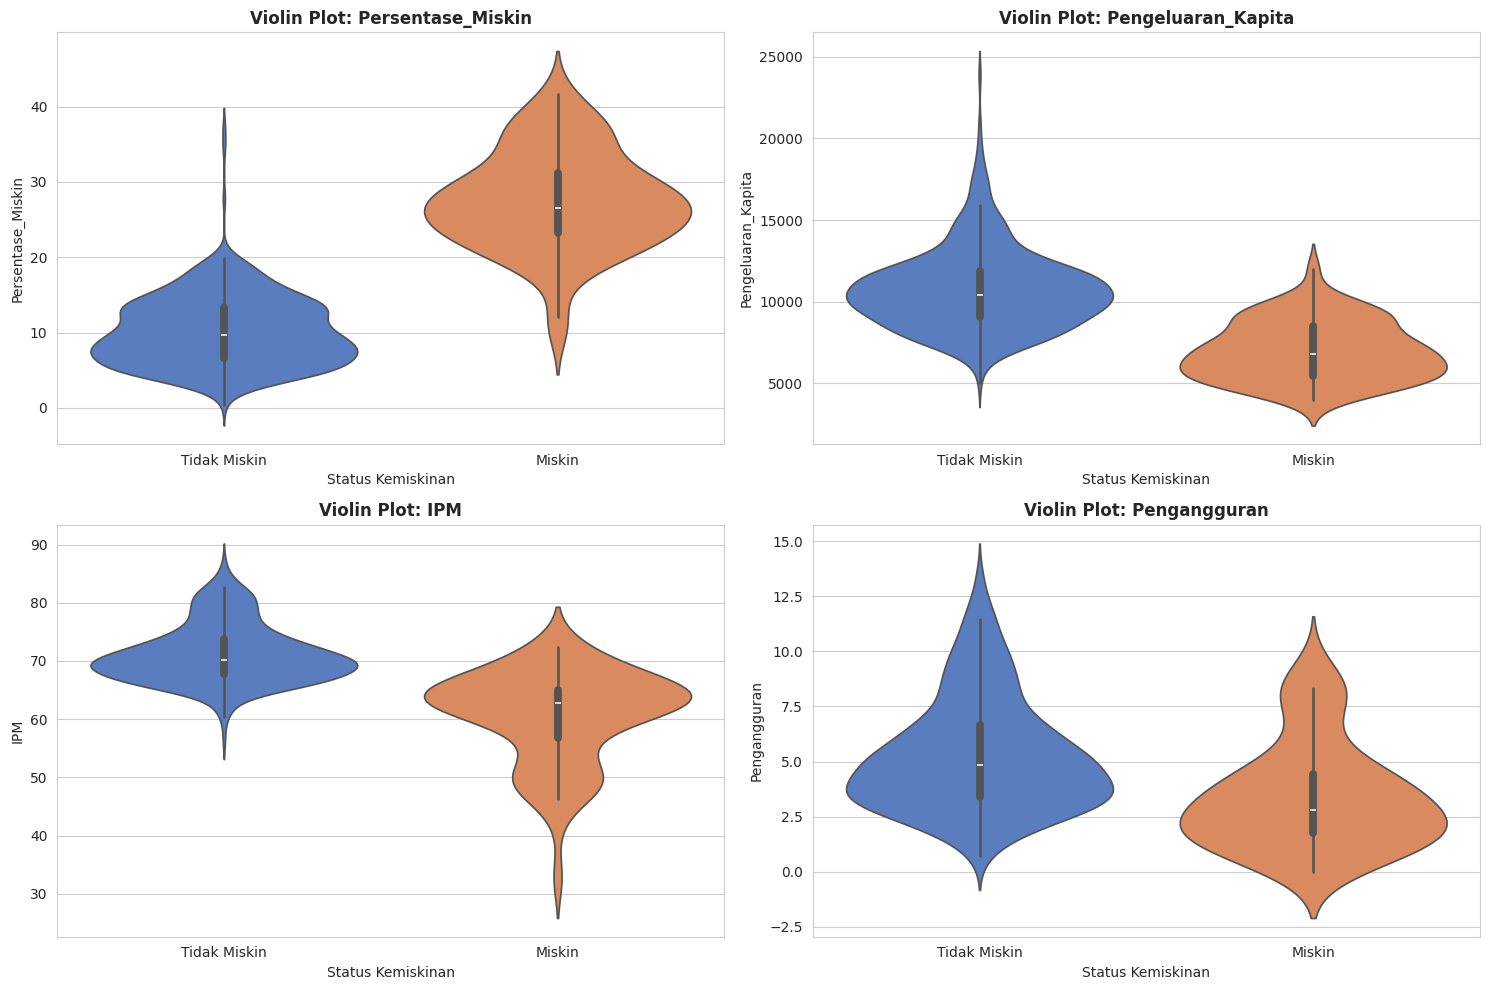


💡 VIOLIN PLOT vs BOXPLOT:
- Violin plot menunjukkan distribusi lengkap (seperti histogram yang dirotasi)
- Lebar violin = kepadatan data pada nilai tersebut
- Lebih informatif dibanding boxplot untuk distribusi multimodal



In [ ]:
print("\n" + "=" * 60)
print("🎻 VIOLIN PLOT: DISTRIBUSI LENGKAP")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(kolom_numerik):
    sns.violinplot(data=df, x='Label_Kemiskinan', y=col,
                   palette='muted', ax=axes[idx])
    axes[idx].set_title(f'Violin Plot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Status Kemiskinan', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

print("""
💡 VIOLIN PLOT vs BOXPLOT:
- Violin plot menunjukkan distribusi lengkap (seperti histogram yang dirotasi)
- Lebar violin = kepadatan data pada nilai tersebut
- Lebih informatif dibanding boxplot untuk distribusi multimodal
""")

# - FEATURE IMPORTANCE VISUALIZATION (CORRELATION-BASED)


⭐ IMPORTANCE FITUR BERDASARKAN KORELASI


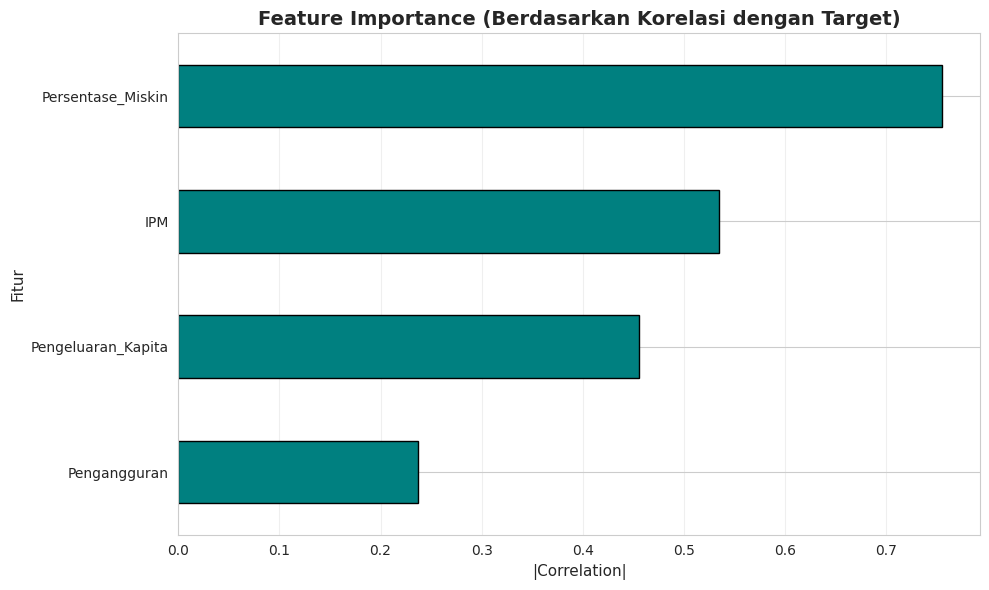


🏆 Ranking Fitur:
1. Persentase_Miskin: 0.7554
2. IPM: 0.5351
3. Pengeluaran_Kapita: 0.4561
4. Pengangguran: 0.2373


In [ ]:
print("\n" + "=" * 60)
print("⭐ IMPORTANCE FITUR BERDASARKAN KORELASI")
print("=" * 60)

# Korelasi absolut dengan target
feature_importance = abs(correlation_matrix['Klasifikasi Kemiskinan']).sort_values(ascending=True)
feature_importance = feature_importance[feature_importance.index != 'Klasifikasi Kemiskinan']

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Feature Importance (Berdasarkan Korelasi dengan Target)',
          fontsize=14, fontweight='bold')
plt.xlabel('|Correlation|', fontsize=11)
plt.ylabel('Fitur', fontsize=11)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🏆 Ranking Fitur:")
for i, (feature, corr) in enumerate(feature_importance.sort_values(ascending=False).items(), 1):
    print(f"{i}. {feature}: {corr:.4f}")


# - SUMMARY & INSIGHTS

In [ ]:
print("\n" + "=" * 60)
print("📝 SUMMARY & KEY INSIGHTS")
print("=" * 60)

print("""
✅ HASIL EKSPLORASI DATA:

1️⃣ KUALITAS DATA:
   - Total data: {} baris
   - Missing values: {}
   - Duplikasi: {}

2️⃣ DISTRIBUSI TARGET:
   - Tidak Miskin: {} ({:.1f}%)
   - Miskin: {} ({:.1f}%)

3️⃣ FITUR PALING BERPENGARUH:
   {}

4️⃣ KORELASI TERTINGGI DENGAN TARGET:
   {}

5️⃣ REKOMENDASI UNTUK MODELING:
   ✓ Data sudah cukup bersih dan siap untuk modeling
   ✓ Pertimbangkan normalisasi/standardisasi fitur
   ✓ Monitor class imbalance jika ratio > 1.5
   ✓ Feature engineering bisa meningkatkan performa
   ✓ Gunakan cross-validation untuk evaluasi

🔑 KEY TAKEAWAY:
"Visualisasi data adalah langkah krusial sebelum modeling.
Data yang dipahami dengan baik menghasilkan model yang lebih baik!"
""".format(
    len(df),
    'Tidak ada' if df.isnull().sum().sum() == 0 else f'{df.isnull().sum().sum()} values',
    f'{df.duplicated().sum()} baris',
    target_counts['Tidak Miskin'],
    (target_counts['Tidak Miskin']/len(df)*100),
    target_counts['Miskin'],
    (target_counts['Miskin']/len(df)*100),
    feature_importance.sort_values(ascending=False).head(1).index[0],
    f"{feature_importance.sort_values(ascending=False).iloc[0]:.4f}"
))

print("\n" + "=" * 60)
print("🎉 VISUALISASI DATA SELESAI!")
print("=" * 60)
print("\n💡 NEXT STEPS:")
print("   1. Export insights untuk laporan")
print("   2. Feature engineering jika diperlukan")
print("   3. Pilih algoritma ML yang sesuai")
print("   4. Training & evaluasi model")
print("\n🚀 Selamat melanjutkan ke tahap modeling!")


📝 SUMMARY & KEY INSIGHTS

✅ HASIL EKSPLORASI DATA:

1️⃣ KUALITAS DATA:
   - Total data: 514 baris
   - Missing values: Tidak ada
   - Duplikasi: 0 baris

2️⃣ DISTRIBUSI TARGET:
   - Tidak Miskin: 452 (87.9%)
   - Miskin: 62 (12.1%)

3️⃣ FITUR PALING BERPENGARUH:
   Persentase_Miskin

4️⃣ KORELASI TERTINGGI DENGAN TARGET:
   0.7554

5️⃣ REKOMENDASI UNTUK MODELING:
   ✓ Data sudah cukup bersih dan siap untuk modeling
   ✓ Pertimbangkan normalisasi/standardisasi fitur
   ✓ Monitor class imbalance jika ratio > 1.5
   ✓ Feature engineering bisa meningkatkan performa
   ✓ Gunakan cross-validation untuk evaluasi

🔑 KEY TAKEAWAY:
"Visualisasi data adalah langkah krusial sebelum modeling.
Data yang dipahami dengan baik menghasilkan model yang lebih baik!"


🎉 VISUALISASI DATA SELESAI!

💡 NEXT STEPS:
   1. Export insights untuk laporan
   2. Feature engineering jika diperlukan
   3. Pilih algoritma ML yang sesuai
   4. Training & evaluasi model

🚀 Selamat melanjutkan ke tahap modeling!


# - MACHINE LEARNING MODELING — KLASIFIKASI TINGKAT KEMISKINAN

In [ ]:
print("\n" + "=" * 60)
print("🤖 MACHINE LEARNING MODELING — CLASSIFICATION")
print("=" * 60)

# Tambahan library untuk model baru
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import joblib


🤖 MACHINE LEARNING MODELING — CLASSIFICATION


# -  DATA PREPARATION UNTUK MODEL

In [ ]:
# Fitur dan target
X = df[kolom_numerik]
y = df['Klasifikasi Kemiskinan']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Data training : {X_train.shape[0]} baris")
print(f"Data testing  : {X_test.shape[0]} baris")
print("\nDistribusi kelas sebelum SMOTE:")
print(y_train.value_counts())


Data training : 411 baris
Data testing  : 103 baris

Distribusi kelas sebelum SMOTE:
Klasifikasi Kemiskinan
0    361
1     50
Name: count, dtype: int64


# - HANDLING CLASS IMBALANCE — SMOTE + VISUALISASI BAR CHART

In [ ]:
print("\n⚖️ MENERAPKAN SMOTE UNTUK MENGATASI IMBALANCE...")

# Hitung distribusi kelas sebelum SMOTE
before_counts = y_train.value_counts()

# Terapkan SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Hitung distribusi setelah SMOTE
after_counts = y_train_res.value_counts()

print("✅ Setelah SMOTE:")
print(after_counts)


⚖️ MENERAPKAN SMOTE UNTUK MENGATASI IMBALANCE...
✅ Setelah SMOTE:
Klasifikasi Kemiskinan
0    361
1    361
Name: count, dtype: int64


## - VISUALISASI PERBANDINGAN KELAS SEBELUM DAN SESUDAH SMOTE

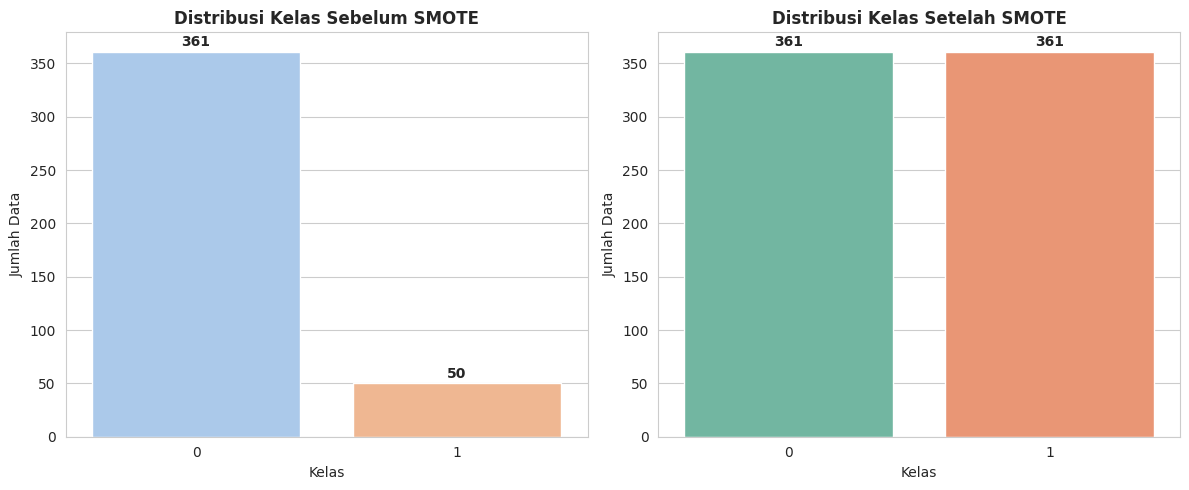

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(
    x=before_counts.index,
    y=before_counts.values,
    palette="pastel", ax=axes[0]
)
axes[0].set_title("Distribusi Kelas Sebelum SMOTE", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Kelas")
axes[0].set_ylabel("Jumlah Data")
for i, v in enumerate(before_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

sns.barplot(
    x=after_counts.index,
    y=after_counts.values,
    palette="Set2", ax=axes[1]
)
axes[1].set_title("Distribusi Kelas Setelah SMOTE", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Kelas")
axes[1].set_ylabel("Jumlah Data")
for i, v in enumerate(after_counts.values):
    axes[1].text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# - TRAINING MODEL (BASELINES)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

results = []

print("\n🚀 Training Model...")
for name, model in models.items():
    model.fit(X_train_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    results.append([name, acc, prec, rec, f1, roc_auc])

    print(f"\n📈 Hasil Model: {name}")
    print("-" * 50)
    print(f"Akurasi      : {acc:.4f}")
    print(f"Presisi      : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1-Score     : {f1:.4f}")
    print(f"ROC-AUC      : {roc_auc:.4f}")



🚀 Training Model...

📈 Hasil Model: Logistic Regression
--------------------------------------------------
Akurasi      : 0.9612
Presisi      : 0.7500
Recall       : 1.0000
F1-Score     : 0.8571
ROC-AUC      : 0.9899

📈 Hasil Model: Random Forest
--------------------------------------------------
Akurasi      : 0.9806
Presisi      : 0.8571
Recall       : 1.0000
F1-Score     : 0.9231
ROC-AUC      : 0.9913

📈 Hasil Model: Decision Tree
--------------------------------------------------
Akurasi      : 0.9515
Presisi      : 0.7059
Recall       : 1.0000
F1-Score     : 0.8276
ROC-AUC      : 0.9890

📈 Hasil Model: K-Nearest Neighbors
--------------------------------------------------
Akurasi      : 0.9709
Presisi      : 0.8000
Recall       : 1.0000
F1-Score     : 0.8889
ROC-AUC      : 0.9890


# - PERBANDINGAN HASIL MODEL

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
1,Random Forest,0.980583,0.857143,1.0,0.923077,0.991300
3,K-Nearest Neighbors,0.970874,0.800000,1.0,0.888889,0.989011
0,Logistic Regression,0.961165,0.750000,1.0,0.857143,0.989927
2,Decision Tree,0.951456,0.705882,1.0,0.827586,0.989011


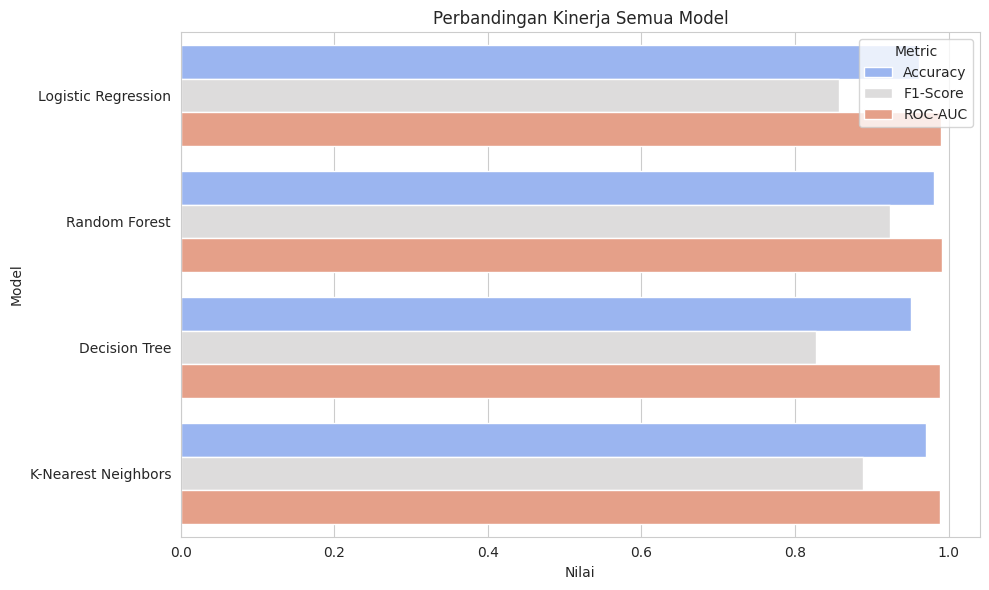

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
display(results_df.sort_values(by="F1-Score", ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df.melt(id_vars="Model", value_vars=["Accuracy", "F1-Score", "ROC-AUC"]),
    x="value", y="Model", hue="variable", palette="coolwarm"
)
plt.title("Perbandingan Kinerja Semua Model")
plt.xlabel("Nilai")
plt.ylabel("Model")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# - EVALUASI DETAIL MODEL TERBAIK (CONFUSION MATRIX + REPORT)


🏆 MODEL TERBAIK: Random Forest

=== Classification Report ===
              precision    recall  f1-score   support

Tidak Miskin       1.00      0.98      0.99        91
      Miskin       0.86      1.00      0.92        12

    accuracy                           0.98       103
   macro avg       0.93      0.99      0.96       103
weighted avg       0.98      0.98      0.98       103



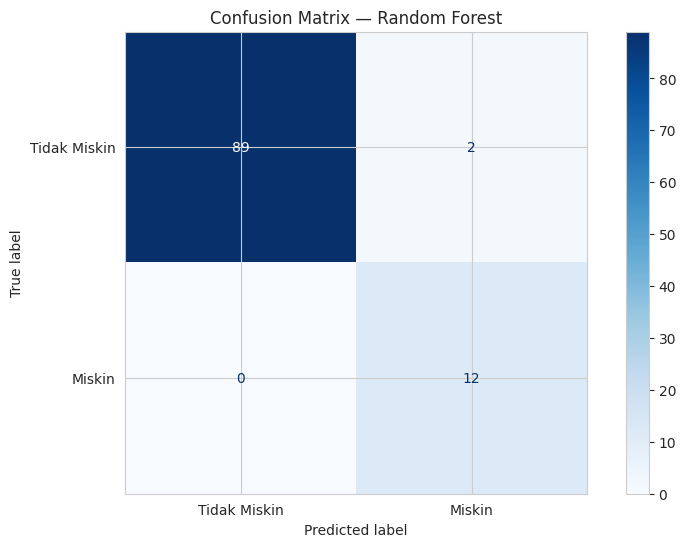

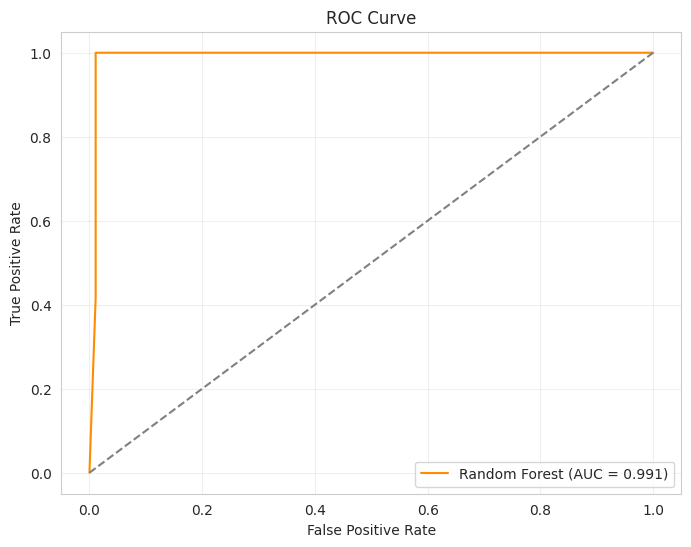

In [ ]:
best_model_name = results_df.sort_values(by="F1-Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test_scaled)

print(f"\n🏆 MODEL TERBAIK: {best_model_name}\n")
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_best, target_names=["Tidak Miskin", "Miskin"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Miskin", "Miskin"])
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix — {best_model_name}")
plt.show()

# ROC Curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve
)


y_score = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {roc_auc_score(y_test, y_score):.3f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# - SIMPAN MODEL TERBAIK

In [ ]:
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"\n💾 Model '{best_model_name}' berhasil disimpan sebagai file .pkl!")
print("\n✅ Tahap Modeling dan Evaluasi Selesai!")


💾 Model 'Random Forest' berhasil disimpan sebagai file .pkl!

✅ Tahap Modeling dan Evaluasi Selesai!
